<a href="https://colab.research.google.com/github/alexbakercan/CS167Fall22Project2/blob/main/CS167_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
#### Grimas and Thanos Classification Convolutional Neural Networks
#### Name: Alex Baker 

# Rubric and Grading



| **Description/Writing**  |**I think I deserve** |**Actual Grade**|**Notes** |
| :------------------------------- | -------: | ----: |:---- |
| 1: Problem                       |        2/2|       /2|    |
| 2: Data Prep                     |        2/2|       /2|    | 
| 3: Research                      |       9.5/10|      /10|    |
| 4: Analysis                      |       9.5/10|      /10|    | 
| 5: Bumps in the Road.            |        1/1|       /1|    |
| <b>Total                         |       24/25|      /25|    </b>|

I beleive I deserve the grade above because I have met all of the requirements. This project covers all bases, anaylizing CNN and its application well. I did not want to give myself a perfect score because there is always room for improvement. If given more time I would hopefully find a model with better preformance and I can alaways go deeper with anaylisis so I did not give full points in those categories. Despite this I still have 4 models in total and robust anaylisis so I belive a 24/25 is an accurate grade.

## Problem

With the data set I selected I am attempteting to deterime weather an inputted image is one of two things: thanos or grimace. As a result this is a classification problem and I am using convolutional neural networks to solve it. For the data set I am using, I found it on kaggle. It has the name 
' Thanos or Grimace:
Images used to train and evaluate a CNN-based model ' 
by ARTURO MONCADA TORRES. It has a usability score of 8.13 and contains 462 images of both characters. After looking at the options for this project I was most inclined to use the CNN, mostly because the first option was too similar to the last project and I was more familiar with proccesing images rather than audio. I found many different potenial datasets, most of which would have ended in the same result. The only big difference being how many differnt things being classified. Due to this I decided to try somthing a little more fun and when I came upon this dataset I knew I had to use it. 

## Data Preparation 

I did not choose to use the given simpsons data set and as a result had to prepare my data before even uploading it to colab. It did not have designated test and train split folders within the file when I downloaded and unzipped it. To remedy this I created a new set of folders set up the proepr way with train/test folders and characters deliminated within. From there I mannually went through and transfered the images to the respective folders with ending in a 24% test/train split. Now that I had my data ready I was ready to go into colab and did the ussal preperation. This includes enabeling the GPU, importing the proper liabraries, setting directories and dimensions, and finally loading the data. Now that I have completed all nessisary preperation work I am confident that I am ready to work with my data. 



### Enable GPUs!!


In [353]:
from google.colab import drive
import pandas
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [354]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [355]:
import keras
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.9.2
Keras version: 2.9.0


In [356]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [357]:
# import the libraries
import keras
import sys
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import sys

In [358]:
# dimensions of our images.
img_width = 64
img_height = 64

#the directories where our train and test data is
train_data_dir = '/content/drive/MyDrive/CS167Datasets/grimos/Train' 
test_data_dir = '/content/drive/MyDrive/CS167Datasets/grimos/Test'   

#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 32

# Load the data


In [359]:
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

#These will look for our training and testing data
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary') 

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 366 images belonging to 2 classes.
Found 89 images belonging to 2 classes.


24% test split^^

# Convolutional Neural Network (CNN) 

In [363]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten()) 
model.add(Dense(32)) 
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy']) 


In [364]:
training_results = model.fit_generator(
        train_data, 
        steps_per_epoch = len(train_data), 
        epochs=9, #epochs 
        validation_data = test_data, 
        validation_steps = len(test_data)
        )

Epoch 1/9
12/12 [==============================] - 2s 125ms/step - loss: 0.6881 - accuracy: 0.5574 - val_loss: 0.6578 - val_accuracy: 0.6517
Epoch 2/9
12/12 [==============================] - 1s 93ms/step - loss: 0.6420 - accuracy: 0.6995 - val_loss: 0.6364 - val_accuracy: 0.6404
Epoch 3/9
12/12 [==============================] - 1s 95ms/step - loss: 0.6149 - accuracy: 0.7295 - val_loss: 0.6257 - val_accuracy: 0.6629
Epoch 4/9
12/12 [==============================] - 1s 91ms/step - loss: 0.6027 - accuracy: 0.7077 - val_loss: 0.5963 - val_accuracy: 0.7303
Epoch 5/9
12/12 [==============================] - 1s 95ms/step - loss: 0.5652 - accuracy: 0.7432 - val_loss: 0.5732 - val_accuracy: 0.7416
Epoch 6/9
12/12 [==============================] - 1s 92ms/step - loss: 0.5591 - accuracy: 0.7186 - val_loss: 0.5710 - val_accuracy: 0.6742
Epoch 7/9
12/12 [==============================] - 1s 93ms/step - loss: 0.5299 - accuracy: 0.7432 - val_loss: 0.5239 - val_accuracy: 0.7753
Epoch 8/9
12/12 [==

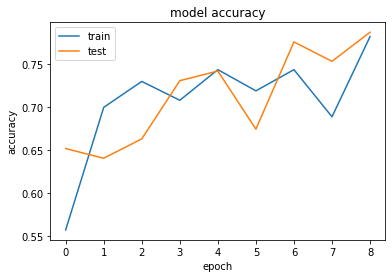

In [365]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Tuned CNN


This model includes a dropout layer at the begining followed by a layer with width of 128. Keeping the amount of layers down aided in preformance along with the other alterations made. Running the model multiple times showed it to consistently preform better, espeiclally the training line. It was a little inconsistent but overall outpreformed the original.

In [27]:
from keras.layers import Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(Dropout(0.2, (32,)))

model.add(Conv2D(128, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten()) 
model.add(Dense(128)) 
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy']) 

In [28]:
training_results = model.fit_generator(
        train_data, 
        steps_per_epoch = len(train_data), 
        epochs=9, #epochs 
        validation_data = test_data, 
        validation_steps = len(test_data)
        )

Epoch 1/9
12/12 [==============================] - 2s 114ms/step - loss: 0.8528 - accuracy: 0.5683 - val_loss: 0.6659 - val_accuracy: 0.5455
Epoch 2/9
12/12 [==============================] - 1s 98ms/step - loss: 0.6018 - accuracy: 0.7322 - val_loss: 0.5482 - val_accuracy: 0.7841
Epoch 3/9
12/12 [==============================] - 1s 94ms/step - loss: 0.5685 - accuracy: 0.7623 - val_loss: 0.5321 - val_accuracy: 0.7045
Epoch 4/9
12/12 [==============================] - 1s 95ms/step - loss: 0.5496 - accuracy: 0.7404 - val_loss: 0.4315 - val_accuracy: 0.8977
Epoch 5/9
12/12 [==============================] - 1s 99ms/step - loss: 0.4479 - accuracy: 0.8415 - val_loss: 0.3598 - val_accuracy: 0.9205
Epoch 6/9
12/12 [==============================] - 2s 160ms/step - loss: 0.4386 - accuracy: 0.8115 - val_loss: 0.3227 - val_accuracy: 0.9205
Epoch 7/9
12/12 [==============================] - 1s 94ms/step - loss: 0.4162 - accuracy: 0.8197 - val_loss: 0.3281 - val_accuracy: 0.8977
Epoch 8/9
12/12 [=

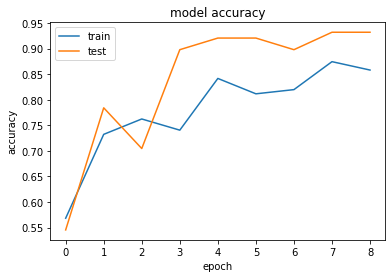

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 2nd Tuned Model 


In running and tuning this model I wanted to experiment with the amount of layers present as well as the order they are in mostly moving the dropout layers. Running a model with more layers proved very difficult to get good preformance. If I added anymore than the one dropout layers than profemance tanked. This makes sense as it reduces too much and cannot accruatly preform. With three other pooling layers I was able to get decent preformance but still seemed to be worse than the original. Even if not better, I still took away a lot from this model and was able to test the effects of layering well. 

In [39]:
from keras.layers import Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))



model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(Dropout(0.2, (32,)))



model.add(Flatten()) 
model.add(Dense(32)) 
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy']) 

In [40]:
training_results = model.fit_generator(
        train_data, 
        steps_per_epoch = len(train_data), 
        epochs=9, #epochs 
        validation_data = test_data, 
        validation_steps = len(test_data)
        )

Epoch 1/9
12/12 [==============================] - 2s 162ms/step - loss: 0.7006 - accuracy: 0.4563 - val_loss: 0.6929 - val_accuracy: 0.5455
Epoch 2/9
12/12 [==============================] - 1s 94ms/step - loss: 0.6861 - accuracy: 0.5628 - val_loss: 0.6859 - val_accuracy: 0.5455
Epoch 3/9
12/12 [==============================] - 1s 92ms/step - loss: 0.6787 - accuracy: 0.5820 - val_loss: 0.6793 - val_accuracy: 0.5455
Epoch 4/9
12/12 [==============================] - 1s 98ms/step - loss: 0.6722 - accuracy: 0.5683 - val_loss: 0.6729 - val_accuracy: 0.5568
Epoch 5/9
12/12 [==============================] - 1s 91ms/step - loss: 0.6658 - accuracy: 0.5902 - val_loss: 0.6659 - val_accuracy: 0.5795
Epoch 6/9
12/12 [==============================] - 1s 94ms/step - loss: 0.6658 - accuracy: 0.6339 - val_loss: 0.6597 - val_accuracy: 0.5682
Epoch 7/9
12/12 [==============================] - 1s 95ms/step - loss: 0.6598 - accuracy: 0.6066 - val_loss: 0.6503 - val_accuracy: 0.6818
Epoch 8/9
12/12 [==

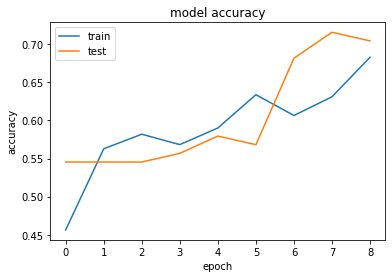

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 3rd Tuned Model

With this model being the last I wanted to include the most robust testing and try out as many differnt alterations to see how it would effect things. Surprisingly most of the time I could not get results that were better than the original. It proved to be a little inconsistent when I ran them multiple times but generally was not the results I was looking for. In my testing I tried the following things: 
- Messed with differing kernal sizes going all the way up to (18,18)
- Changing number of layers both high and low
- Messing with the order and number of each type of layer 
- Changing the pooling size 
- Altering the layer width 

The layer width is the point at which I finnally began to get better preformance. I was brainstorming solutions and thought that by decreasing the width of a layer and increasing the depth could prove advantageous. Even though it was a large reduction I hoped by compesating in the depth of layers would even it out. Intially I had too many layers, and as discovered above, this didnt yeild great preformance. I reduced it down some and found 3 layers to be best. Even thought it was a little inconsistent I found a model that yeilds better preofrmance. This one includes the dropout layer first with each layer only having a width of 8. This model gave me the most insight into CNN's and the way that they function and can be manipulated. 

In [202]:
from keras.layers import Dropout

model = Sequential()


model.add(Conv2D(8, (2, 2), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(Dropout(0.2, (8,)))

model.add(Conv2D(8, (2, 2), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size = (1,1)))

model.add(Conv2D(8, (2, 2), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size = (1,1)))



model.add(Flatten()) 
model.add(Dense(32)) 
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy']) 


In [200]:
training_results = model.fit_generator(
        train_data, 
        steps_per_epoch = len(train_data), 
        epochs=9, #epochs 
        validation_data = test_data, 
        validation_steps = len(test_data)
        )

Epoch 1/9
12/12 [==============================] - 2s 112ms/step - loss: 0.7173 - accuracy: 0.5546 - val_loss: 0.6471 - val_accuracy: 0.6932
Epoch 2/9
12/12 [==============================] - 1s 91ms/step - loss: 0.6211 - accuracy: 0.7158 - val_loss: 0.5495 - val_accuracy: 0.8182
Epoch 3/9
12/12 [==============================] - 1s 95ms/step - loss: 0.5124 - accuracy: 0.7842 - val_loss: 0.4459 - val_accuracy: 0.7727
Epoch 4/9
12/12 [==============================] - 1s 91ms/step - loss: 0.5302 - accuracy: 0.7623 - val_loss: 0.4500 - val_accuracy: 0.8750
Epoch 5/9
12/12 [==============================] - 1s 92ms/step - loss: 0.5110 - accuracy: 0.7432 - val_loss: 0.4149 - val_accuracy: 0.8409
Epoch 6/9
12/12 [==============================] - 1s 92ms/step - loss: 0.5421 - accuracy: 0.7760 - val_loss: 0.5604 - val_accuracy: 0.8409
Epoch 7/9
12/12 [==============================] - 1s 90ms/step - loss: 0.4578 - accuracy: 0.8251 - val_loss: 0.3553 - val_accuracy: 0.8750
Epoch 8/9
12/12 [==

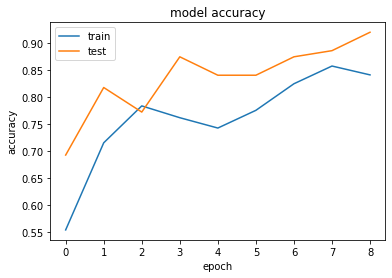

In [201]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Validating With Different Images

# Test 1

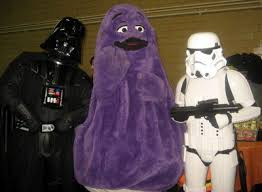

In [386]:
from IPython.display import Image
display(Image('/content/drive/MyDrive/CS167Datasets/grimos/Test/Grimace/grimace_(169).jpg'))

In [387]:
from keras.utils import load_img
from keras.utils import img_to_array
img = load_img('/content/drive/MyDrive/CS167Datasets/grimos/Test/Grimace/grimace_(169).jpg', target_size=(64, 64))

# convert to array
img = img_to_array(img)

img = img.reshape(1, 64, 64, 3)
img = img.astype('float32')
img = datagen.standardize(img)

# predict the class
result = model.predict(img)
print(result)

1/1 [==============================] - 0s 17ms/step
[[0.5652908]]


In [388]:
import os
vals = list(result[0])

classes = os.listdir('/content/drive/MyDrive/CS167Datasets/grimos/Train')
classes.sort()
max_index = vals.index(max(vals)) 
print(classes[max_index])

Grimace


# Test 2

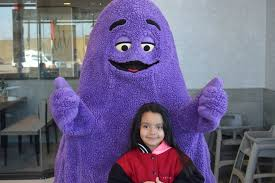

In [389]:
from IPython.display import Image
display(Image('/content/drive/MyDrive/CS167Datasets/grimos/Test/Grimace/grimace_(165).jpg'))

In [390]:
from keras.utils import load_img
from keras.utils import img_to_array
img = load_img('/content/drive/MyDrive/CS167Datasets/grimos/Test/Grimace/grimace_(165).jpg', target_size=(64, 64))

# convert to array
img = img_to_array(img)

img = img.reshape(1, 64, 64, 3)
img = img.astype('float32')
img = datagen.standardize(img)

# predict the class
result = model.predict(img)
print(result)

1/1 [==============================] - 0s 19ms/step
[[0.48110276]]


In [391]:
import os
vals = list(result[0])

classes = os.listdir('/content/drive/MyDrive/CS167Datasets/grimos/Train')
classes.sort()
max_index = vals.index(max(vals)) 
print(classes[max_index])

Grimace


# Test 3

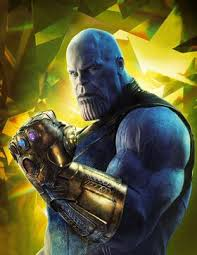

In [392]:
from IPython.display import Image
display(Image('/content/drive/MyDrive/CS167Datasets/grimos/Test/Thanos/thanos_(4).jpg'))

In [393]:
from keras.utils import load_img
from keras.utils import img_to_array
img = load_img('/content/drive/MyDrive/CS167Datasets/grimos/Test/Thanos/thanos_(4).jpg', target_size=(64, 64))

# convert to array
img = img_to_array(img)

img = img.reshape(1, 64, 64, 3)
img = img.astype('float32')
img = datagen.standardize(img)

# predict the class
result = model.predict(img)
print(result)

1/1 [==============================] - 0s 18ms/step
[[0.835689]]


In [394]:
import os
vals = list(result[0])

classes = os.listdir('/content/drive/MyDrive/CS167Datasets/grimos/Train')
classes.sort()
max_index = vals.index(max(vals)) 
print(classes[max_index])

Grimace


# Analysis 


I discovered a lot throughout the whole process of this project. At the begining there were challenges but also a lot of learning as to what it took selecting and then getting my data into working condition. I found it interesitng the way it processed the images and how I had to set it up. I will not go in depth into each model as I have included analysis before each. In running through all of these CNN models I found two tuned models that worked very well. The 1st tuned model which included a dropout layer followed by a tuned layer with width of 128. The 2nd tuned model also has a dropout layer followed by three layers, all layers having width of 8. 

**note: these models do have more layers I am just describing them by the relevant ones I changed* 


All of these models are relativly simple by not having very many layers within. As we saw in the 2nd tuned model the depth of it has a signifigant influence on preformance. Part of the good preformance of the models can be attributed to having limited layers, espeically when considering the relative good preformance of my original model. Another reason for the improved preformance from these tuned models is becasue of the order they are in. They both include a dropout layer first before running any others. Including a dropout layer in this postition ensures that the first batch of training samples does not infleuence the learning in a disportionate manner and that features learned later on are not ignored as much. Here is where tuned model 1 and 3 differ, but I belive there many be some correlation with this idea. As I somewhat described in the anaylsis of model 3, I was thinking of these in terms of dimensionality, ie. depth and width. In math the area taken up by a rectangle can be proportionalty kept constant even if dimensions are changing. If kept in proportion the area does not change, so correlating this idea to this problem the complexity/ information learned loosely relates to area. 

With the 1st tuned model I used a layer with 128 nodes. This was not very deep but contained many connections within its second layer. If I had to choose a best this model would be the winner. It has really good preformance and runs accurately. The 3rd tuned model also runs very well, however this model is a lot more consistent and so I choose it as my best for that reason. With the 3rd tuned model I dropped the width quite signifigatnly and added more layers to compensate. With this model I tested a lot of different things before landing on the idea outlined above. This was the only version where I could improve the performance even further. The models overall preformaed relativly well so it was difficult to see improvements. 

I believe the biggest infleucning factor in these models was the depth and order of the dropout layer. The models that followed this performed the best and should be used. You could get away with using the original model as well, however the processing time is signifigatnly higher. Running this model takes longer because it does not have a dropout layer and so it is not as practical. Testing the models with individual images proved accurate, which is consistent with the accuracy seen.

# Bumps in the Road

As I have already touched on a little, I ran into some issues early on in preparing my data. It was not formatted with the correct folders so I had to do some modification to correct this. I also ran into some issues, stemming from the creation of these folders because apparently I included an extra hidden space at the end of one. I did not find this out until much later and after much headache. This was a road bump that was solved through meticulous combing of pathing and ivestigation into the way things were saved. The last things that I struggled with was tuning my models to get better performance. Going off my original model with fairly good performacne meant that a lot of changes made only worsened the model. This took time and testing of various combinations and alterations. There wasn not really anything to it besides repetition and after trying enough models I found ones that worked quite well. Despite these challenges I was able to find solutions to all of them and got a good model as a result. 